In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('googleplaystrore.csv')

### 컬럼 설명
Current Ver = 어플 업데이트 버전
Android Ver = 어플이 돌아가기 위한 핸드폰 최소 성능

In [4]:
df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3239,Cache Cleaner-DU Speed Booster (booster & clea...,TOOLS,4.5,12759663,15M,"100,000,000+",Free,0,Everyone,Tools,"July 25, 2018",3.1.2,4.0 and up
7892,Results for CT Lottery,FAMILY,4.5,86,8.6M,"5,000+",Free,0,Teen,Entertainment,"March 11, 2017",5.1,4.1 and up
6794,BT Remote (SPP) for Bluetooth,TOOLS,4.1,36,3.1M,"10,000+",Free,0,Everyone,Tools,"October 24, 2016",1.16,2.3.3 and up
7923,Space Coast CU Mobile,FINANCE,3.8,922,2.1M,"100,000+",Free,0,Everyone,Finance,"July 13, 2017",2.1.0.1108,2.3 and up
10095,Pink Guy - Ey B0ss,FAMILY,4.7,13,1.2M,500+,Free,0,Everyone,Entertainment,"May 4, 2016",1.0,4.0.3 and up


In [5]:
df.isnull().sum()
# Rating null값이 많은데, 상관관계를 아직 알 수 없음
# 추후에 다시 봐야 함

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## 밀린 데이터 한줄 수정


In [6]:
df[df['Installs']=='Free']

df.loc[df['Installs']=='Free', 'Category'] = 'PHOTOGRAPHY'

df.loc[df['App']=='Life Made WI-Fi Touchscreen Photo Frame', 'Rating'] = '1.9'
df.loc[df['App']=='Life Made WI-Fi Touchscreen Photo Frame', 'Reviews'] = '19'
df.loc[df['App']=='Life Made WI-Fi Touchscreen Photo Frame', 'Size'] = '3.0M'
df.loc[df['App']=='Life Made WI-Fi Touchscreen Photo Frame', 'Installs'] = '1000+'
df.loc[df['App']=='Life Made WI-Fi Touchscreen Photo Frame', 'Type'] = 'Free'
df.loc[df['App']=='Life Made WI-Fi Touchscreen Photo Frame', 'Price'] = '0'
df.loc[df['App']=='Life Made WI-Fi Touchscreen Photo Frame', 'Content Rating'] = 'Everyone'
df.loc[df['App']=='Life Made WI-Fi Touchscreen Photo Frame', 'Genres'] = 'Photography'
df.loc[df['App']=='Life Made WI-Fi Touchscreen Photo Frame', 'Last Updated'] = 'February 11, 2018'
df.loc[df['App']=='Life Made WI-Fi Touchscreen Photo Frame', 'Current Ver'] = '1.0.19'
df.loc[df['App']=='Life Made WI-Fi Touchscreen Photo Frame', 'Android Ver'] = '4.0 and up'

df[df['App']=='Life Made WI-Fi Touchscreen Photo Frame']

df['Installs'].value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
1000+                1
Name: Installs, dtype: int64

# Last Updated 년/월

In [7]:
df['upYear'] = df['Last Updated'].apply(lambda x: x[ -4:])

In [8]:
df['upMonth'] = df['Last Updated'].apply(lambda x: x.split(" ")[0])

In [9]:
import calendar
dic = dict((v,k) for k,v in enumerate(calendar.month_abbr))
dic

{'': 0,
 'Jan': 1,
 'Feb': 2,
 'Mar': 3,
 'Apr': 4,
 'May': 5,
 'Jun': 6,
 'Jul': 7,
 'Aug': 8,
 'Sep': 9,
 'Oct': 10,
 'Nov': 11,
 'Dec': 12}

In [10]:
df['upMonth'] = df['upMonth'].apply(lambda x: x[:3])

In [11]:
df['upMonth'] = df['upMonth'].transform(lambda x : dic[x])

In [12]:
df['upYear'] = df['upYear'].apply(lambda x: int(x))

In [13]:
df['upYM'] = df['upYear'] + df['upMonth']/100

In [14]:
df[df['upYear']==2018]['upYM'].unique()
# 데이터 업데이트 마지막은 2018년 8월

array([2018.01, 2018.08, 2018.06, 2018.04, 2018.07, 2018.03, 2018.05,
       2018.02])

# Category 살펴보기

In [15]:
df['Category'].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             336
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

In [16]:
df['Type'].value_counts()

Free    10040
Paid      800
Name: Type, dtype: int64

In [17]:
np.set_printoptions(threshold = np.nan)

ValueError: threshold must be numeric and non-NAN, try sys.maxsize for untruncated representation

In [18]:
pd.options.display.max_rows = 999

In [19]:
df['Genres'].value_counts()

Tools                                    842
Entertainment                            623
Education                                549
Medical                                  463
Business                                 460
Productivity                             424
Sports                                   398
Personalization                          392
Communication                            387
Lifestyle                                381
Finance                                  366
Action                                   365
Health & Fitness                         341
Photography                              336
Social                                   295
News & Magazines                         283
Shopping                                 260
Travel & Local                           257
Dating                                   234
Books & Reference                        231
Arcade                                   220
Simulation                               200
Casual    

# [Installs] to int 

In [20]:
df.loc[df['Installs'] == '0', 'Installs'] = '0+'

In [21]:
df['Installs'] = df['Installs'].apply(lambda x : x[:-1])

In [22]:
df['Installs'] = df['Installs'].apply(lambda x : x.replace(',', ""))

# Size 단위 통일

In [23]:
df['Size'].value_counts()

Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
15M                    184
17M                    160
19M                    154
16M                    149
26M                    149
25M                    143
20M                    139
21M                    138
24M                    136
10M                    136
18M                    133
23M                    117
22M                    114
29M                    103
27M                     97
28M                     95
30M                     84
33M                     79
3.3M                    77
37M                     76
35M                     72
31M                     70
2.9M                    69
2.5M                    68
2.3M                    68
3.4M                    65
2.8M                    65
34M                     63
3.7M                    63
32M                     63
3.8M                    62
40M                     62
3

In [24]:
df['Size'] = df['Size'].apply(lambda x : x[:-1] if x[-1] == 'k' else x[:-1] + '0')

In [25]:
df.loc[df['Size']=='Varies with devic0', 'Size'] = np.nan

In [26]:
df['Size'].value_counts()

110      198
120      196
140      194
130      191
150      184
170      161
190      155
160      150
260      149
250      143
200      140
210      139
240      137
100      136
180      133
230      117
220      115
290      103
270       98
280       96
300       84
330       79
3.30      77
370       76
350       73
310       70
2.90      69
2.30      68
2.50      68
3.40      65
2.80      65
3.70      63
400       63
340       63
320       63
3.90      62
3.80      62
3.00      62
4.00      61
440       61
460       60
360       60
4.20      59
480       59
5.00      58
3.60      57
3.10      56
390       56
3.20      55
380       55
4.30      54
2.70      53
4.10      52
3.50      51
5.40      51
2.00      51
4.90      50
1.80      50
2.60      50
2.40      48
430       48
1.50      48
410       48
5.70      48
4.60      46
6.30      45
2.20      45
500       45
490       45
5.30      44
5.10      43
530       43
420       42
4.40      42
1.20      41
630       41
6.90      40

# Price 전처리

In [27]:
df['Price'].value_counts()

0          10041
$0.99        148
$2.99        129
$1.99         73
$4.99         72
$3.99         63
$1.49         46
$5.99         30
$2.49         26
$9.99         21
$6.99         13
$399.99       12
$14.99        11
$4.49          9
$29.99         7
$24.99         7
$3.49          7
$7.99          7
$19.99         6
$5.49          6
$11.99         5
$6.49          5
$8.99          5
$12.99         5
$1.00          3
$2.00          3
$10.00         3
$16.99         3
$33.99         2
$9.00          2
$7.49          2
$39.99         2
$1.70          2
$13.99         2
$8.49          2
$10.99         2
$3.95          2
$79.99         2
$17.99         2
$1.50          1
$1.97          1
$4.85          1
$4.60          1
$37.99         1
$4.80          1
$3.61          1
$2.50          1
$4.77          1
$1.61          1
$2.95          1
$3.04          1
$1.04          1
$2.90          1
$4.84          1
$2.56          1
$1.29          1
$299.99        1
$74.99         1
$18.99        

In [28]:
df['Price'] = df['Price'].apply(lambda x : x.replace('$', ""))

In [29]:
df['Price'].value_counts()

0         10041
0.99        148
2.99        129
1.99         73
4.99         72
3.99         63
1.49         46
5.99         30
2.49         26
9.99         21
6.99         13
399.99       12
14.99        11
4.49          9
29.99         7
7.99          7
24.99         7
3.49          7
5.49          6
19.99         6
11.99         5
8.99          5
12.99         5
6.49          5
10.00         3
16.99         3
1.00          3
2.00          3
3.95          2
8.49          2
79.99         2
10.99         2
1.70          2
9.00          2
39.99         2
13.99         2
33.99         2
17.99         2
7.49          2
394.99        1
89.99         1
4.59          1
3.88          1
19.90         1
109.99        1
1.26          1
4.85          1
2.50          1
4.84          1
1.50          1
4.80          1
28.99         1
1.96          1
1.61          1
4.60          1
2.59          1
1.29          1
1.59          1
14.00         1
400.00        1
379.99        1
154.99        1
5.00    

# Version 소수점 한자리까지만 살리기

In [30]:
df['Android Ver2'] = df['Android Ver'].replace('Varies with device', np.nan)

In [31]:
df.loc[df['Current Ver'] == 'Varies with device', 'Current Ver'] = np.nan
df['Current Ver'] = df['Current Ver'].astype('str')


In [32]:
df['Current Ver'].sample(50)

465                9.8.000000010501
4963                          1.2.4
7394                            1.0
3790                            nan
1617                           10.0
8924                          1.0.0
9357                           6.08
8625                          1.1.7
9487                          6.7.1
3758                         3.53.2
5176                    300000.1.08
7876                          1.2.0
111                             6.0
7440                            1.0
2712                         4.20.5
9012                          1.1.1
2249                          2.0.1
913                           4.8.6
3669                            7.1
7374                          1.2.1
8730                    di-v3.4.0.4
2091                         1.4.12
4509                          3.1.0
10707                           nan
6190                        1.0.0.1
3056                            nan
3888                      4.8.0.132
9805                        

In [33]:
df['Current Ver'] = df['Current Ver'].apply(lambda x: x if x is None
                                                 else x if len(x) == 1
                                                 else x.split('.')[0])

In [34]:
df['Current Ver'].unique()

array(['1', '2', 'nan', '6', '3', '5', '4', '11', '0', '8', '10', '18',
       '9', '15', '14', '7', '99', '12', '37', '24', '47', 'R6', '69',
       '42', '196', '2018', '20', '13', 'v1', '01', '43', '16',
       'Cannonau 3', 'p5', '112', 'Public', '220', '858', 'v3',
       'Version:6', '02', '3196', '5423', '19', '1_39_93', '79', '108',
       '57', '60', '149', '37893', '20180609', '28', '25', '300000', 'PN',
       'Initial', 'T4', '50', '27', '29', '584', '22', '71', '1004', '06',
       '2017', '17', '53', 'v5', 'MyMetro_HTML_2', 'v8', 'v7', '32',
       '20180517', 'v150', '40', '68', 'FreeTimeApp-aosp_v3',
       'Natalia Studio Development', '30', '116', '04', '27500000',
       'version 0', '5055', 'a', '31', '1009001', '1900001', 'v8[1', '23',
       '1805', '1,01', 'v2018', 'H7SubTV0', 'v2', '263', '65',
       'acremotecontrol18', 'v67_slk3',
       'airConditionerMaintenance_13112015', '11;11',
       'acremotecontrol-v7', '1255162018', 'v4', '117', 'cli-6',
       'Ver

# 안드로이드 버전

In [35]:
df['Android Ver']

0              4.0.3 and up
1              4.0.3 and up
2              4.0.3 and up
3                4.2 and up
4                4.4 and up
                ...        
10836            4.1 and up
10837            4.1 and up
10838            2.2 and up
10839    Varies with device
10840    Varies with device
Name: Android Ver, Length: 10841, dtype: object

In [36]:
df['Android Ver'] = df['Android Ver'].replace('Varies with device', np.nan)

In [37]:
df['Android Ver'] = df['Android Ver'].astype('str')

In [38]:
# df['Android Ver'] = df['Android Ver'].replace('and up', '') 

In [39]:
df['Android Ver'].apply(lambda x : x.replace('and up', ''))

0        4.0.3 
1        4.0.3 
2        4.0.3 
3          4.2 
4          4.4 
          ...  
10836      4.1 
10837      4.1 
10838      2.2 
10839       nan
10840       nan
Name: Android Ver, Length: 10841, dtype: object

In [40]:
df['Android Ver'] = df['Android Ver'].apply(lambda x: x if x is None
                                                 else x if len(x) <= 3
                                                 else x[:3])

In [41]:
df['Android Ver']

0        4.0
1        4.0
2        4.0
3        4.2
4        4.4
        ... 
10836    4.1
10837    4.1
10838    2.2
10839    nan
10840    nan
Name: Android Ver, Length: 10841, dtype: object

# 카테고리 더미코딩

In [42]:
df['Category2'] = df['Category']
df = pd.get_dummies(df, columns=['Category2'], prefix='C')

In [43]:
df['Reviews'] = df['Reviews'].apply(lambda x: float(x))
df['Size'] = df['Size'].apply(lambda x: float(x))
df['Installs'] = df['Installs'].apply(lambda x: float(x))
df['Price'] = df['Price'].apply(lambda x: float(x))
# df['Current Ver'] = df['Current Ver'].apply(lambda x: float(x))
df['Android Ver'] = df['Android Ver'].apply(lambda x: float(x))

C_FAMILY                -0.056908
C_MEDICAL               -0.038129
C_BUSINESS              -0.032892
C_LIFESTYLE             -0.031594
C_FINANCE               -0.028730
C_DATING                -0.025040
C_SPORTS                -0.024573
C_HEALTH_AND_FITNESS    -0.022935
C_PERSONALIZATION       -0.021712
C_FOOD_AND_DRINK        -0.017039
C_AUTO_AND_VEHICLES     -0.015514
C_LIBRARIES_AND_DEMO    -0.015393
C_HOUSE_AND_HOME        -0.014413
C_EDUCATION             -0.014036
C_EVENTS                -0.013789
C_MAPS_AND_NAVIGATION   -0.013541
C_PARENTING             -0.013107
C_COMICS                -0.012748
C_BOOKS_AND_REFERENCE   -0.012400
C_ART_AND_DESIGN        -0.012378
C_BEAUTY                -0.012325
Price                   -0.011688
C_WEATHER               -0.010542
C_TOOLS                 -0.006411
C_SHOPPING              -0.005478
C_ENTERTAINMENT          0.005267
C_TRAVEL_AND_LOCAL       0.020496
C_NEWS_AND_MAGAZINES     0.021232
C_VIDEO_PLAYERS          0.030269
C_PHOTOGRAPHY 

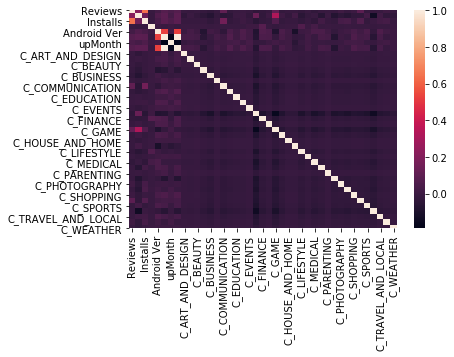

In [44]:
corr = df.corr()
sns.heatmap(corr)
corr['Installs'].sort_values()

In [47]:
comm = df[df['C_COMMUNICATION'] == 1]

In [48]:
comm['Rating'].describe()

count     328.0
unique     25.0
top         4.3
freq       67.0
Name: Rating, dtype: float64

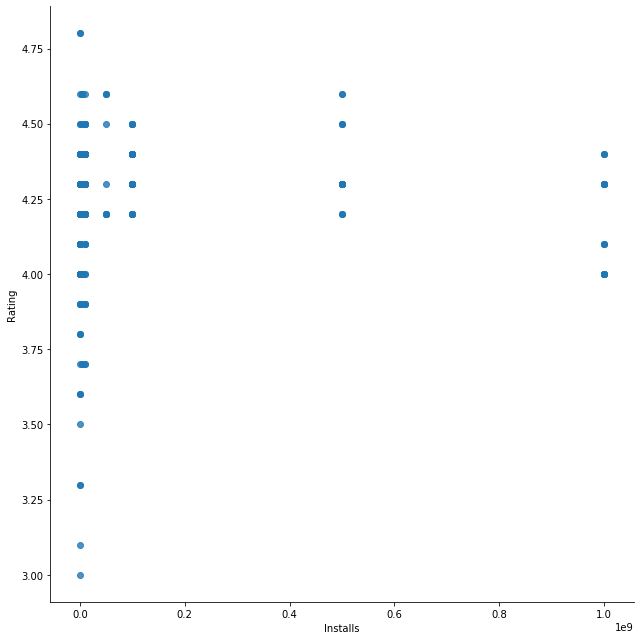

In [49]:
sns.lmplot(data = comm[comm['Installs'] >= 100000], x = 'Installs', y= 'Rating', fit_reg=False, height=9)

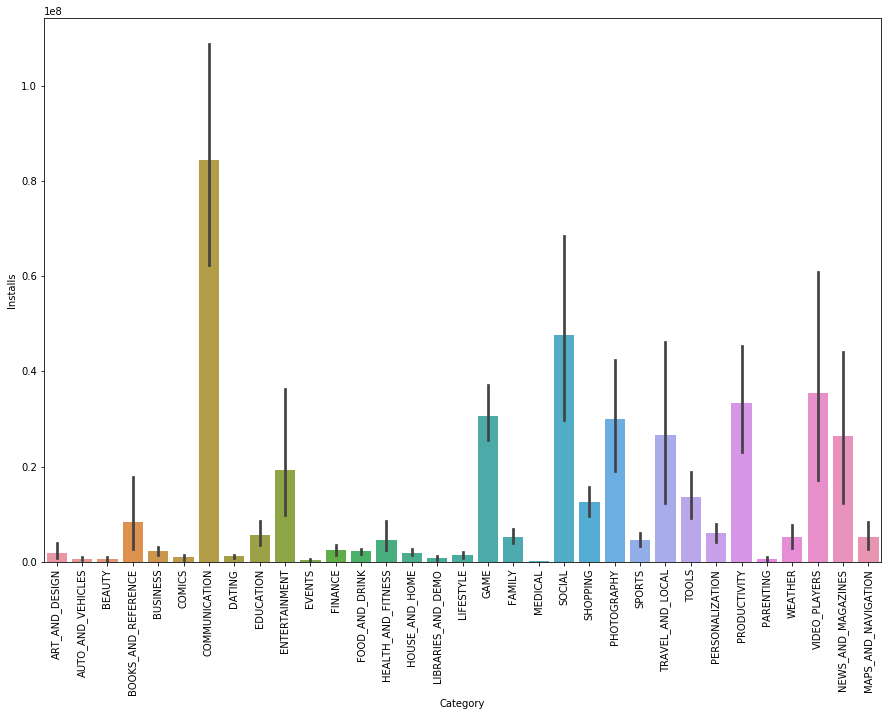

In [50]:
# plt.plot('Category', 'Installs',data=df)
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
plt.xticks(rotation = 90 )
sns.barplot(x='Category', y='Installs', data=df, ax = ax, hue_order='Rating')
# sns.boxplot(x='Category', y='Installs', data=df, ax = ax)

TypeError: unsupported operand type(s) for +: 'float' and 'str'

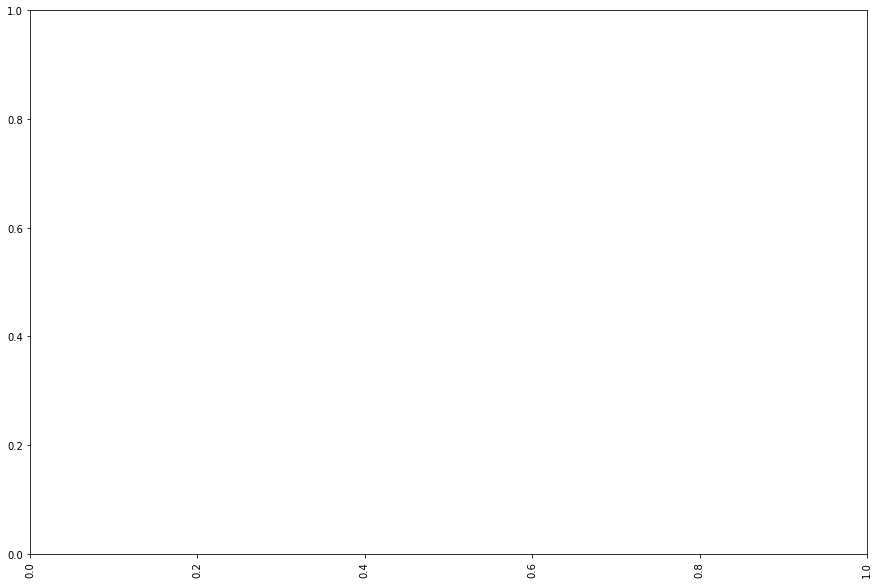

In [51]:
# plt.plot('Category', 'Installs',data=df)
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
plt.xticks(rotation = 90 )
sns.barplot(x='Category', y='Rating', data=df, ax = ax)
# sns.boxplot(x='Category', y='Installs', data=df, ax = ax)

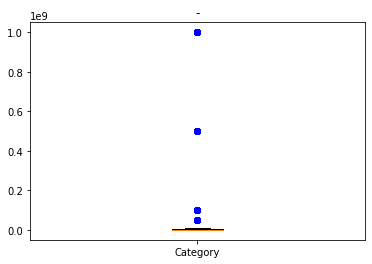

In [52]:
# setting outlier symbol, title, xlabel

plt.boxplot(df['Installs'], sym="bo")

plt.title('-')

plt.xticks([1], ['Category'])

plt.show()



# 카테고리 별 
# 제작 수 vs 다운로드 수

In [53]:
df.groupby('Category').count()['App'].sort_values()

Category
BEAUTY                   53
PARENTING                60
COMICS                   60
EVENTS                   64
ART_AND_DESIGN           65
WEATHER                  82
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
HOUSE_AND_HOME           88
FOOD_AND_DRINK          127
MAPS_AND_NAVIGATION     137
ENTERTAINMENT           149
EDUCATION               156
VIDEO_PLAYERS           175
BOOKS_AND_REFERENCE     231
DATING                  234
TRAVEL_AND_LOCAL        258
SHOPPING                260
NEWS_AND_MAGAZINES      283
SOCIAL                  295
PHOTOGRAPHY             336
HEALTH_AND_FITNESS      341
FINANCE                 366
LIFESTYLE               382
SPORTS                  384
COMMUNICATION           387
PERSONALIZATION         392
PRODUCTIVITY            424
BUSINESS                460
MEDICAL                 463
TOOLS                   843
GAME                   1144
FAMILY                 1972
Name: App, dtype: int64

In [54]:
df.groupby('Category').mean()['Installs'].sort_values()

Category
MEDICAL                1.150269e+05
EVENTS                 2.495806e+05
BEAUTY                 5.131519e+05
PARENTING              5.253518e+05
AUTO_AND_VEHICLES      6.250613e+05
LIBRARIES_AND_DEMO     7.411284e+05
COMICS                 9.347692e+05
DATING                 1.129533e+06
LIFESTYLE              1.407444e+06
ART_AND_DESIGN         1.912894e+06
HOUSE_AND_HOME         1.917187e+06
FOOD_AND_DRINK         2.156683e+06
BUSINESS               2.178076e+06
FINANCE                2.395215e+06
SPORTS                 4.560350e+06
HEALTH_AND_FITNESS     4.642441e+06
WEATHER                5.196348e+06
FAMILY                 5.201959e+06
MAPS_AND_NAVIGATION    5.286729e+06
EDUCATION              5.586231e+06
PERSONALIZATION        5.932385e+06
BOOKS_AND_REFERENCE    8.318050e+06
SHOPPING               1.249173e+07
TOOLS                  1.358573e+07
ENTERTAINMENT          1.925611e+07
NEWS_AND_MAGAZINES     2.648876e+07
TRAVEL_AND_LOCAL       2.662359e+07
PHOTOGRAPHY        

In [55]:
df.groupby('Category').describe()['Installs']

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
ART_AND_DESIGN,65.0,1.912894e+06,6.664810e+06,0.0,10000.0,100000.0,500000.0,5.000000e+07
AUTO_AND_VEHICLES,85.0,6.250613e+05,1.746710e+06,1.0,1000.0,100000.0,500000.0,1.000000e+07
BEAUTY,53.0,5.131519e+05,1.523140e+06,50.0,10000.0,50000.0,500000.0,1.000000e+07
BOOKS_AND_REFERENCE,231.0,8.318050e+06,6.745986e+07,1.0,1000.0,10000.0,1000000.0,1.000000e+09
BUSINESS,460.0,2.178076e+06,1.019870e+07,0.0,100.0,1000.0,100000.0,1.000000e+08
COMICS,60.0,9.347692e+05,2.103069e+06,50.0,10000.0,100000.0,1000000.0,1.000000e+07
COMMUNICATION,387.0,8.435989e+07,2.327870e+08,1.0,5000.0,1000000.0,10000000.0,1.000000e+09
DATING,234.0,1.129533e+06,2.673457e+06,1.0,1000.0,100000.0,500000.0,1.000000e+07
EDUCATION,156.0,5.586231e+06,1.580886e+07,1000.0,500000.0,1000000.0,5000000.0,1.000000e+08


In [57]:
df[df['Category'] == 'FAMILY']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,C_PERSONALIZATION,C_PHOTOGRAPHY,C_PRODUCTIVITY,C_SHOPPING,C_SOCIAL,C_SPORTS,C_TOOLS,C_TRAVEL_AND_LOCAL,C_VIDEO_PLAYERS,C_WEATHER
2014,YouTube Kids,FAMILY,4.5,470694.0,NaN,50000000.0,Free,0.0,Everyone,Entertainment;Music & Video,...,0,0,0,0,0,0,0,0,0,0
2015,Candy Bomb,FAMILY,4.4,42145.0,200.0,10000000.0,Free,0.0,Everyone,Casual;Brain Games,...,0,0,0,0,0,0,0,0,0,0
2016,ROBLOX,FAMILY,4.5,4449910.0,670.0,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,...,0,0,0,0,0,0,0,0,0,0
2017,Jewels Crush- Match 3 Puzzle,FAMILY,4.4,14774.0,190.0,1000000.0,Free,0.0,Everyone,Casual;Brain Games,...,0,0,0,0,0,0,0,0,0,0
2018,Coloring & Learn,FAMILY,4.4,12753.0,510.0,5000000.0,Free,0.0,Everyone,Educational;Creativity,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10821,Poop FR,FAMILY,NaN,6.0,2.5,50.0,Free,0.0,Everyone,Entertainment,...,0,0,0,0,0,0,0,0,0,0
10827,Fr Agnel Ambarnath,FAMILY,4.2,117.0,130.0,5000.0,Free,0.0,Everyone,Education,...,0,0,0,0,0,0,0,0,0,0
10834,FR Calculator,FAMILY,4,7.0,2.6,500.0,Free,0.0,Everyone,Education,...,0,0,0,0,0,0,0,0,0,0
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,530.0,5000.0,Free,0.0,Everyone,Education,...,0,0,0,0,0,0,0,0,0,0


In [59]:
df.isnull().sum()

App                         0
Category                    0
Rating                   1474
Reviews                     0
Size                     1695
Installs                    0
Type                        1
Price                       0
Content Rating              0
Genres                      0
Last Updated                0
Current Ver                 0
Android Ver              1364
upYear                      0
upMonth                     0
upYM                        0
Android Ver2             1364
C_ART_AND_DESIGN            0
C_AUTO_AND_VEHICLES         0
C_BEAUTY                    0
C_BOOKS_AND_REFERENCE       0
C_BUSINESS                  0
C_COMICS                    0
C_COMMUNICATION             0
C_DATING                    0
C_EDUCATION                 0
C_ENTERTAINMENT             0
C_EVENTS                    0
C_FAMILY                    0
C_FINANCE                   0
C_FOOD_AND_DRINK            0
C_GAME                      0
C_HEALTH_AND_FITNESS        0
C_HOUSE_AN

In [60]:
df.to_csv('googlepalystore_processing.csv', index=False)